# Simple Variational AutoEncoder training and inference example

**Description**: in this notebook, we showcase the training process and inference capabilities of a simple variational auto-encoder model.

## Imports, definitions and setup

The first block is needed only when the current environment doesn't have the `dlproject` package installed.
Therefore, if you already cloned the whole repository and run the `pip install -e .` command, you can skip the first block.

If you're running this notebook only on a Jupyter server, run the first block as well in order to obtain the necessary dependencies.

In [ ]:
!git clone https://github.com/peiva-git/deep_learning_project.git
%cd deep_learning_project
!pip install -e .

In [1]:
import dlproject as dlp
import tensorflow as tf

import os.path

2023-11-07 16:19:15.571738: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 16:19:15.571872: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 16:19:15.575361: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 16:19:15.894237: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the MNIST dataset

In [2]:
dataset_builder = dlp.data.MNISTDatasetBuilder()
dataset_builder.preprocess_dataset_simple_vae()
train_x, test_x = dataset_builder.train_x, dataset_builder.test_x
train_y, test_y = dataset_builder.train_y, dataset_builder.test_y

## Instantiate the model

In [3]:
simple_vae = dlp.models.SimpleVAE(input_dim=28 * 28, latent_dim=2)
vae = simple_vae.vae
encoder = simple_vae.encoder
decoder = simple_vae.decoder
vae.compile(optimizer='adam')

2023-11-07 16:19:23.434777: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-07 16:19:23.490684: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-07 16:19:23.490956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Train the model

Train the instantiated model on the MNIST dataset.

This block also saves a backup and a checkpoint every 20 epochs, so that you can automatically resume the training if it gets interrupted.

In [ ]:
if not os.path.exists(os.path.join(os.getcwd(), 'output', 'training-callback-results', f'{vae.name}_mnist')):
    os.makedirs(os.path.join(os.getcwd(), 'output', 'training-callback-results', f'{vae.name}_mnist', 'backup'))
    os.makedirs(os.path.join(os.getcwd(), 'output', 'training-callback-results', f'{vae.name}_mnist', 'model_checkpoints'))

model_dir_path = os.path.join(os.getcwd(), 'output', 'training-callback-results', f'{vae.name}_mnist')

vae.fit(
    train_x, train_x,
    epochs=100,
    batch_size=32,
    validation_data=(test_x, test_x),
    callbacks=[
        tf.keras.callbacks.BackupAndRestore(
            backup_dir=os.path.join(model_dir_path, 'backup'),
            save_freq=37500 # 20 * 1875, each 20 epochs
        ),
        tf.keras.callbacks.ModelCheckpoint(model_dir_path, 'model_checkpoints', save_freq=37500)
    ]
)

Epoch 1/100


2023-11-07 16:19:39.656122: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-07 16:19:40.164175: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fef2c43e150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-07 16:19:40.164195: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2023-11-07 16:19:40.182117: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-07 16:19:40.233373: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-07 16:19:40.345787: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 9s 3ms/step - loss: 184.3181 - val_loss: 166.7080
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 164.7064 - val_loss: 163.3985
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 161.7157 - val_loss: 160.9794
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 159.7331 - val_loss: 159.3213
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 158.0536 - val_loss: 157.5538
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 156.5423 - val_loss: 156.1500
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 155.2908 - val_loss: 154.9714
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 154.3076 - val_loss: 154.3432
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 153.5516 - val_loss: 153.6271
Epoch 10/100
1875/1875 [=========================

INFO:tensorflow:Assets written to: /home/peiva/PycharmProjects/deep_learning_project/output/training-callback-results/vae_mlp_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 149.3503 - val_loss: 149.8160
Epoch 21/100
1875/1875 [==============================] - 6s 3ms/step - loss: 149.1467 - val_loss: 149.8955
Epoch 22/100
1875/1875 [==============================] - 6s 3ms/step - loss: 148.9425 - val_loss: 149.4588
Epoch 23/100
1875/1875 [==============================] - 6s 3ms/step - loss: 148.7403 - val_loss: 149.5958
Epoch 24/100
1875/1875 [==============================] - 6s 3ms/step - loss: 148.5696 - val_loss: 149.1565
Epoch 25/100
1875/1875 [==============================] - 6s 3ms/step - loss: 148.4697 - val_loss: 149.0339
Epoch 26/100
1875/1875 [==============================] - 7s 3ms/step - loss: 148.2231 - val_loss: 148.7258
Epoch 27/100
1875/1875 [==============================] - 6s 3ms/step - loss: 148.0918 - val_loss: 148.7781
Epoch 28/100
1875/1875 [==============================] - 6s 3ms/step - loss: 147.9479 - val_loss: 148.4607
Epoch 29/100
1875/1875 [=================

INFO:tensorflow:Assets written to: /home/peiva/PycharmProjects/deep_learning_project/output/training-callback-results/vae_mlp_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 146.5955 - val_loss: 147.5102
Epoch 41/100
1875/1875 [==============================] - 6s 3ms/step - loss: 146.4959 - val_loss: 147.4858
Epoch 42/100
1875/1875 [==============================] - 6s 3ms/step - loss: 146.4070 - val_loss: 147.3220
Epoch 43/100
1875/1875 [==============================] - 6s 3ms/step - loss: 146.3302 - val_loss: 147.3158
Epoch 44/100
1875/1875 [==============================] - 6s 3ms/step - loss: 146.2212 - val_loss: 147.2674
Epoch 45/100
1875/1875 [==============================] - 6s 3ms/step - loss: 146.1462 - val_loss: 147.1122
Epoch 46/100
1875/1875 [==============================] - 6s 3ms/step - loss: 146.0643 - val_loss: 147.1280
Epoch 47/100
1875/1875 [==============================] - 6s 3ms/step - loss: 145.9973 - val_loss: 147.1491
Epoch 48/100
1875/1875 [==============================] - 6s 3ms/step - loss: 145.9087 - val_loss: 146.9477
Epoch 49/100
1875/1875 [=================

INFO:tensorflow:Assets written to: /home/peiva/PycharmProjects/deep_learning_project/output/training-callback-results/vae_mlp_mnist/assets


1875/1875 [==============================] - 6s 3ms/step - loss: 145.1825 - val_loss: 146.4569
Epoch 61/100
1875/1875 [==============================] - 6s 3ms/step - loss: 145.1094 - val_loss: 146.4815
Epoch 62/100
1875/1875 [==============================] - 6s 3ms/step - loss: 145.0383 - val_loss: 146.4583
Epoch 63/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.9964 - val_loss: 146.6334
Epoch 64/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.9552 - val_loss: 146.4586
Epoch 65/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.8979 - val_loss: 146.3378
Epoch 66/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.8549 - val_loss: 146.4052
Epoch 67/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.8010 - val_loss: 146.7108
Epoch 68/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.7538 - val_loss: 146.2539
Epoch 69/100
1875/1875 [=================

INFO:tensorflow:Assets written to: /home/peiva/PycharmProjects/deep_learning_project/output/training-callback-results/vae_mlp_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 144.2505 - val_loss: 145.7627
Epoch 81/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.2192 - val_loss: 146.1147
Epoch 82/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.1878 - val_loss: 146.1575
Epoch 83/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.1260 - val_loss: 146.1845
Epoch 84/100
1875/1875 [==============================] - 8s 4ms/step - loss: 144.1138 - val_loss: 145.9229
Epoch 85/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.1076 - val_loss: 145.6908
Epoch 86/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.0157 - val_loss: 145.8687
Epoch 87/100
1875/1875 [==============================] - 6s 3ms/step - loss: 143.9920 - val_loss: 145.9879
Epoch 88/100
1875/1875 [==============================] - 6s 3ms/step - loss: 143.9680 - val_loss: 146.2345
Epoch 89/100
1875/1875 [=================

## Save the trained model

Save the just trained model for later use.

In [6]:
if not os.path.exists(os.path.join(os.getcwd(), 'output', 'models')):
    os.makedirs(os.path.join(os.getcwd(), 'output', 'models'))

vae.save_weights(os.path.join(os.getcwd(), 'output', 'models', f'{vae.name}_weights_mnist.keras'))
encoder.save_weights(os.path.join(os.getcwd(), 'output', 'models', f'{encoder.name}_weights_mnist.keras'))
decoder.save_weights(os.path.join(os.getcwd(), 'output', 'models', f'{decoder.name}_weights_mnist.keras'))

## Load the model

Instead of training the model, you can load its weights from a previously saved `.keras` file.

In [8]:
vae.load_weights(os.path.join(os.getcwd(), 'output', 'models', 'vae_mlp_weights_mnist.keras'))
encoder.load_weights(os.path.join(os.getcwd(), 'output', 'models', 'vae_encoder_weights_mnist.keras'))
decoder.load_weights(os.path.join(os.getcwd(), 'output', 'models', 'vae_decoder_weights_mnist.keras'))

ValueError: Layer 'dense' expected 2 variables, but received 0 variables during loading. Expected: ['dense/kernel:0', 'dense/bias:0']

## Visualization

Display a scatter plot of the encoded test data.

313/313 [==============================] - 0s 1ms/step


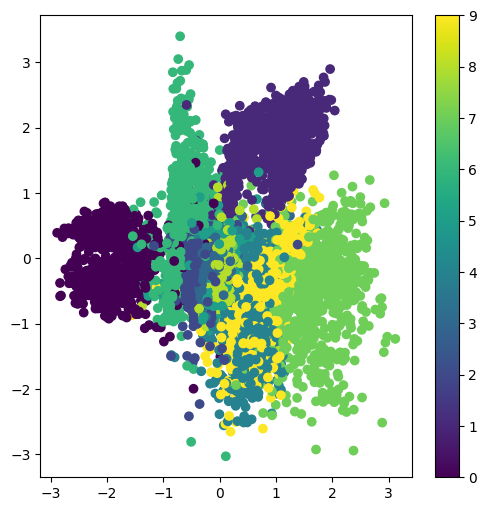

In [19]:
dlp.data.show_mnist_scatter_plot(test_x, test_y, encoder)

Display artificially generated digits.

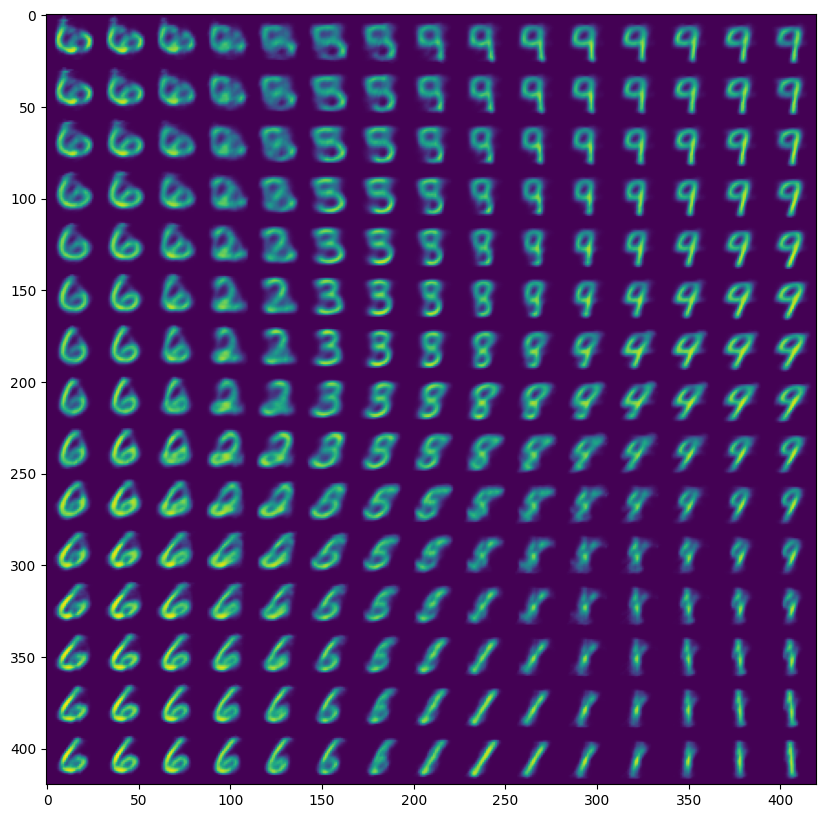

In [26]:
dlp.data.show_latent_plane_sampled_digits(decoder, number_of_digits=15)